In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
print("Shape of x_train:", x_train.shape)
print("Size of train set:", x_train.shape[0])
print("Size of test set:", x_test.shape[0])

Shape of x_train: (60000, 28, 28)
Size of train set: 60000
Size of test set: 10000


7


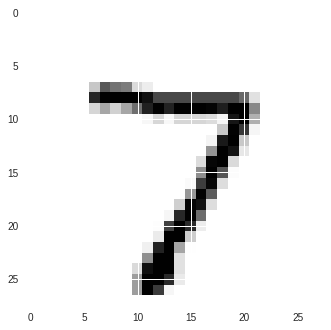

In [38]:
plt.imshow(x_test[0].reshape(28, 28))
print(y_test[0])

In [0]:
n_x = 28
n_y = 28

In [0]:
#(# of training examples, width, height, channels)
x_train = x_train.reshape(x_train.shape[0], n_x, n_y, 1)
x_test = x_test.reshape(x_test.shape[0], n_x, n_y, 1)

In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [0]:
num_classes = 10
batch_size = 128
epochs = 10

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

In [0]:
input_shape = (n_x, n_y, 1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.SGD(lr = 0.01),
              metrics = ['accuracy'])

In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

history = AccuracyHistory()

In [68]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
model.fit(x_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (x_test, y_test),
         callbacks = [history])


(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0254 - acc: 0.9921 - val_loss: 0.0336 - val_acc: 0.9895
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0246 - acc: 0.9928 - val_loss: 0.0394 - val_acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0237 - acc: 0.9929 - val_loss: 0.0316 - val_acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0230 - acc: 0.9933 - val_loss: 0.0326 - val_acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0220 - acc: 0.9936 - val_loss: 0.0325 - val_acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0211 - acc: 0.9939 - val_loss: 0.0330 - val_acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 6s 95us/

In [0]:
score = model.evaluate(x_test, y_test, verbose = 0)

In [70]:
score

[0.03108066888800822, 0.9896]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[4.9279223e-11 1.6698354e-09 2.6637925e-09 1.9091523e-03 7.0872755e-16
 9.9809068e-01 3.9706343e-14 7.4999598e-09 2.2752673e-08 6.1235923e-08]


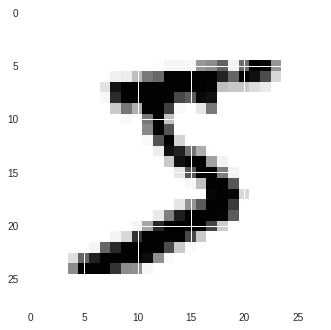

In [71]:
plt.imshow(x_train[0].reshape(28, 28))
print(y_train[0])
print(model.predict(x_train)[0])

[0.9920666666348775, 0.9927666666984558, 0.9929499999682109, 0.99335, 0.9936333333015442, 0.9939, 0.9937666666666667, 0.9941166666666666, 0.9943166666666666, 0.9945833333333334]
[0.9895, 0.9875, 0.989, 0.9903, 0.99, 0.9896, 0.9877, 0.9888, 0.9901, 0.9896]


Text(0,0.5,'Accuracy')

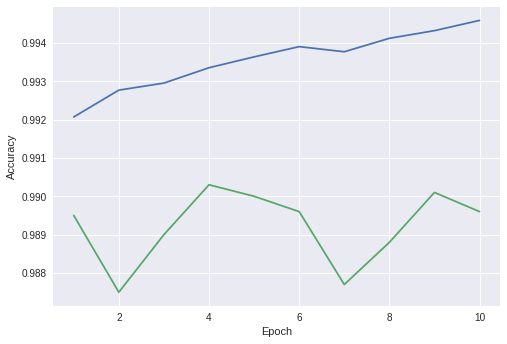

In [74]:
print(history.acc)
print(history.val_acc)
plt.plot(range(1, 11), history.acc)
plt.plot(range(1, 11), history.val_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')